In [1]:
#!pip install numpy
#!pip install pandas

In [7]:
#!conda install pandas
#!conda install matplotlib
#!pip install matplotlib

     |████████████████████████████████| 11.3 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.6 MB/s eta 0:00:01


In [9]:
#!pip install conda

In [12]:
#pip install statsmodels

     |████████████████████████████████| 9.9 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 1.3 MB/s eta 0:00:01     |█████████                       | 11.1 MB 2.3 MB/s eta 0:00:13     |███████████████████████▉        | 29.3 MB 2.1 MB/s eta 0:00:05
Note: you may need to restart the kernel to use updated packages.


In [84]:
#pip install sklearn

     |████████████████████████████████| 26.7 MB 2.3 MB/s eta 0:00:01     |██████████████████▊             | 15.6 MB 2.9 MB/s eta 0:00:04
     |████████████████████████████████| 306 kB 2.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=03a03efb3e5d7e5921b472fa19c3da2d35c2d24ff47ad7b55ef9074de6a699b8
  Stored in directory: /home/fitec/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from statsmodels.tsa.statools import adfuller
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.seasonal import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/home/fitec/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [14]:
import pandas as pd

In [15]:
# import statsmodel.api as sm
import statsmodels.api as sm
from pylab import rcParams

In [16]:
import statsmodels.graphics.tsaplots as smt

In [17]:
df = pd.read_csv('Sales.csv', parse_dates = ['Date'], index_col = ['Date'])
df.sort_index()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Cleaners,Bike Wash - Dissolver,5,3,8,24,15,39
2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Fenders,Fender Set - Mountain,19,8,22,258,152,410
2016-07-31,31,July,2016,48,Adults (35-64),F,United Kingdom,England,Clothing,Caps,AWC Logo Cap,16,7,9,26,112,138


In [18]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


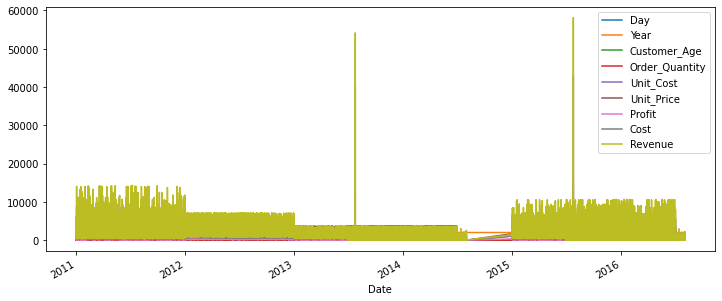

In [19]:
df.plot(figsize=(12, 5))
plt.show()

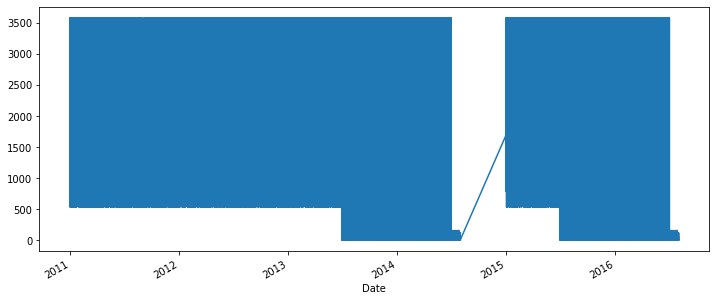

In [20]:
df.Unit_Price.plot(figsize=(12, 5))
plt.show()

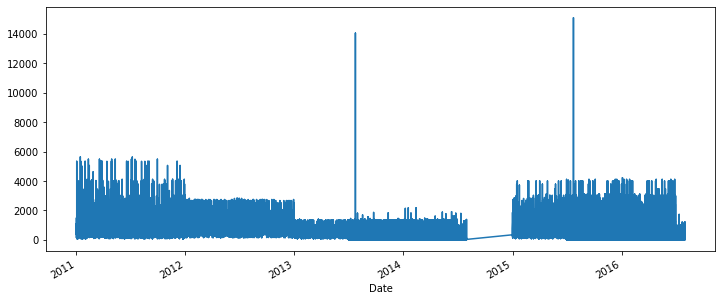

In [21]:
df.Profit.plot(figsize=(12, 5))
plt.show()

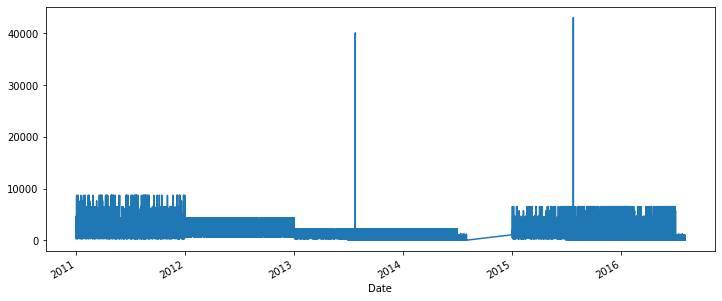

In [22]:
df.Cost.plot(figsize=(12, 5))
plt.show()

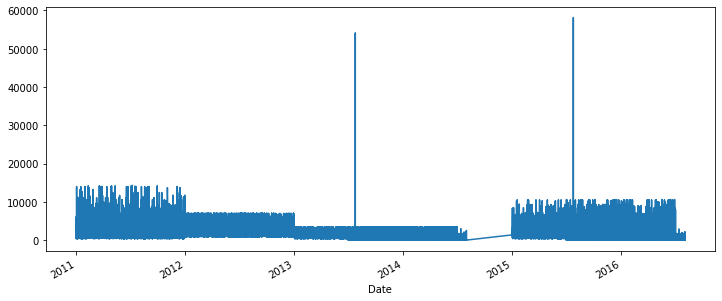

In [23]:
df.Revenue.plot(figsize=(12, 5))
plt.show()

In [24]:
bikes_d = df.loc[df['Product_Category'] == 'Bikes'].sort_index(axis = 0, ascending = True)
#data
# data.sort_index(axis = 0, ascending = True)
bikes_d

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,30,June,2016,29,Young Adults (25-34),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,961,1266,2227
2016-06-30,30,June,2016,53,Adults (35-64),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",1,420,769,318,420,738
2016-06-30,30,June,2016,44,Adults (35-64),F,Germany,Bayern,Bikes,Touring Bikes,"Touring-1000 Yellow, 50",1,1482,2384,878,1482,2360


In [25]:
print(bikes_d.loc['2011-12-25'])

            Day     Month  Year  Customer_Age             Age_Group  \
Date                                                                  
2011-12-25   25  December  2011            34  Young Adults (25-34)   
2011-12-25   25  December  2011            38        Adults (35-64)   
2011-12-25   25  December  2011            31  Young Adults (25-34)   
2011-12-25   25  December  2011            27  Young Adults (25-34)   
2011-12-25   25  December  2011            25  Young Adults (25-34)   
2011-12-25   25  December  2011            50        Adults (35-64)   
2011-12-25   25  December  2011            44        Adults (35-64)   
2011-12-25   25  December  2011            37        Adults (35-64)   

           Customer_Gender         Country                State  \
Date                                                              
2011-12-25               F       Australia           Queensland   
2011-12-25               F       Australia             Victoria   
2011-12-25           

In [26]:
bikes_d.groupby(by=["State"]).sum()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
State,,,,,,,,,
Alberta,254,28185,460,21,17024,27850,17886,28218,46104
Arizona,46,4028,64,4,2532,4640,4216,5064,9280
Bayern,6332,821756,13736,569,446514,752372,418976,631735,1050711
Brandenburg,900,128904,2212,81,61886,103056,49596,75981,125577
British Columbia,23916,3088849,56600,2224,1765036,2958552,1673076,2555823,4228899
California,76544,9803285,182068,6771,5419512,9164162,4930829,7550516,12481345
Charente-Maritime,654,80566,1170,55,33936,58214,31414,47381,78795
England,55058,7097463,122382,4833,3576250,6004866,2974139,4882855,7856994
Essonne,4390,539740,9478,361,348198,581328,285988,475548,761536


In [27]:
bikes_d.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000
mean,15.678008,2013.839235,35.348241,1.401393,1131.561466,1901.138019,789.749673,1588.132476,2377.882149
std,8.744794,1.569079,9.959807,0.710429,587.174564,986.704937,664.465205,1234.047870,1849.199342
min,1.000000,2011.000000,17.000000,1.000000,295.000000,540.000000,66.000000,295.000000,410.000000
25%,8.000000,2013.000000,28.000000,1.000000,487.000000,783.000000,318.000000,713.000000,1042.000000
50%,16.000000,2014.000000,34.000000,1.000000,1252.000000,2295.000000,630.000000,1266.000000,2018.000000
75%,23.000000,2015.000000,42.000000,2.000000,1482.000000,2384.000000,997.000000,2171.000000,2934.000000
max,31.000000,2016.000000,75.000000,4.000000,2171.000000,3578.000000,5638.000000,8684.000000,14312.000000


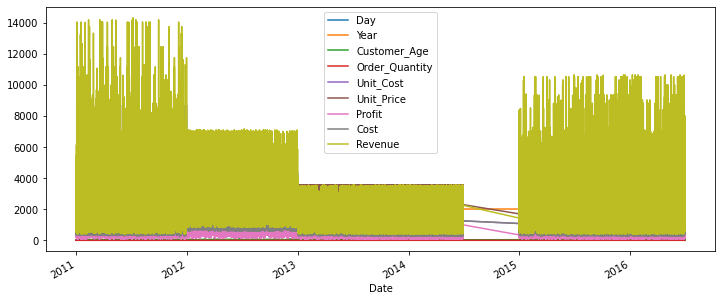

In [28]:
bikes_d.plot(figsize=(12, 5))
plt.show()

<AxesSubplot:xlabel='Date'>

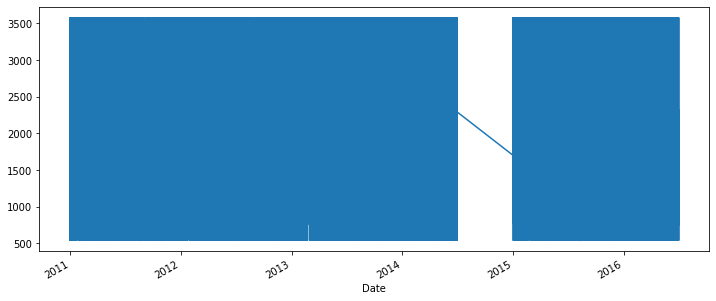

In [29]:
bikes_d.Unit_Price.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

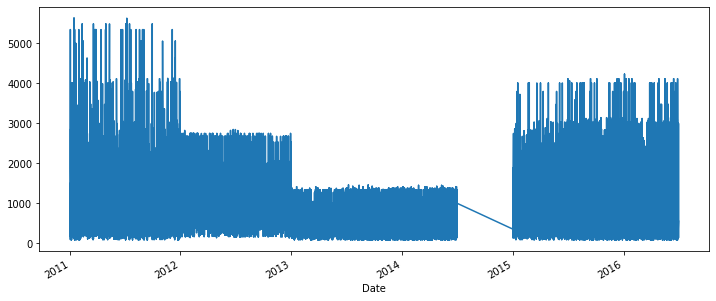

In [30]:
bikes_d.Profit.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

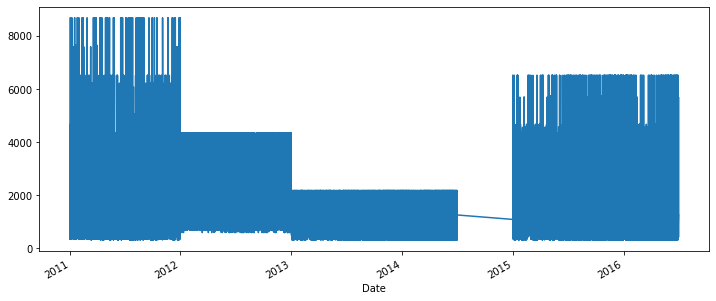

In [31]:
bikes_d.Cost.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

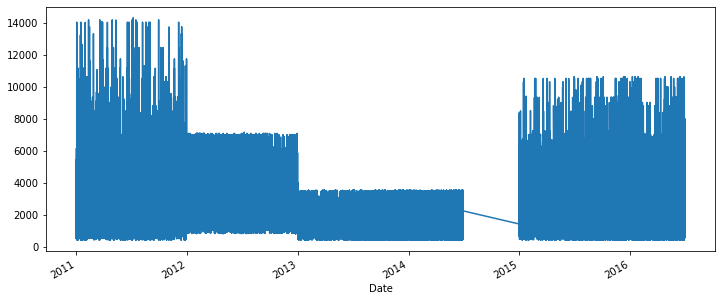

In [32]:
bikes_d.Revenue.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

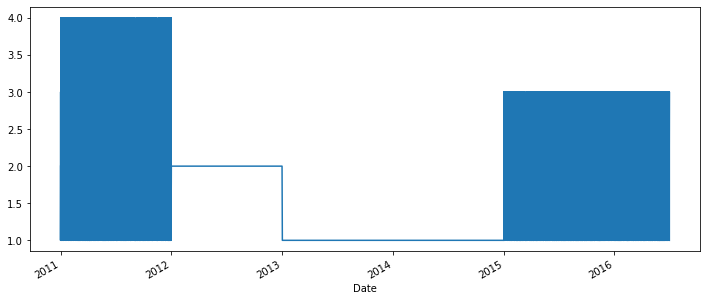

In [33]:
bikes_d.Order_Quantity.plot(figsize=(12, 5))

In [34]:
France_bd = bikes_d.loc[bikes_d['Country'] == 'France']
#data
# data.sort_index(axis = 0, ascending = True)
print(France_bd.sort_index(axis = 0, ascending = True).head(10))

            Day    Month  Year  Customer_Age             Age_Group  \
Date                                                                 
2011-01-01    1  January  2011            33  Young Adults (25-34)   
2011-01-04    4  January  2011            33  Young Adults (25-34)   
2011-01-10   10  January  2011            33  Young Adults (25-34)   
2011-01-12   12  January  2011            33  Young Adults (25-34)   
2011-01-12   12  January  2011            30  Young Adults (25-34)   
2011-01-15   15  January  2011            35        Adults (35-64)   
2011-01-17   17  January  2011            32  Young Adults (25-34)   
2011-01-22   22  January  2011            35        Adults (35-64)   
2011-01-22   22  January  2011            31  Young Adults (25-34)   
2011-01-23   23  January  2011            30  Young Adults (25-34)   

           Customer_Gender Country              State Product_Category  \
Date                                                                     
2011-01-01 

AxesSubplot(0.125,0.2;0.775x0.68)


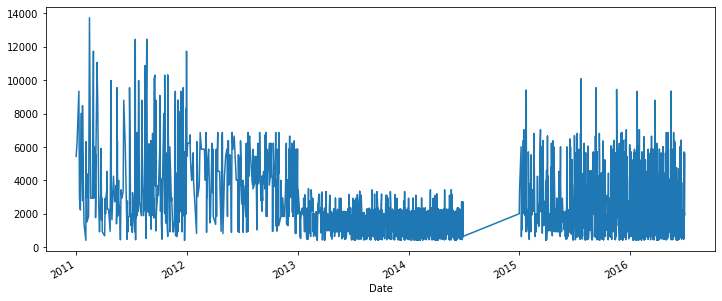

In [35]:
print(France_bd.Revenue.plot(figsize=(12, 5)))

In [36]:
Essonne_bd = bikes_d.loc[bikes_d['State'] == 'Essonne']
print(Essonne_bd.sort_index(axis = 0, ascending = True).head(10))

            Day     Month  Year  Customer_Age             Age_Group  \
Date                                                                  
2011-01-15   15   January  2011            35        Adults (35-64)   
2011-02-05    5  February  2011            27  Young Adults (25-34)   
2011-02-14   14  February  2011            41        Adults (35-64)   
2011-03-04    4     March  2011            37        Adults (35-64)   
2011-03-26   26     March  2011            24           Youth (<25)   
2011-04-12   12     April  2011            27  Young Adults (25-34)   
2011-04-27   27     April  2011            24           Youth (<25)   
2011-05-29   29       May  2011            32  Young Adults (25-34)   
2011-06-19   19      June  2011            40        Adults (35-64)   
2011-07-06    6      July  2011            24           Youth (<25)   

           Customer_Gender Country    State Product_Category    Sub_Category  \
Date                                                               

AxesSubplot(0.125,0.2;0.775x0.68)


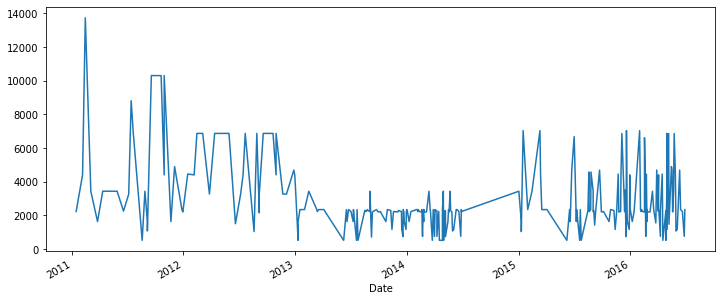

In [37]:
print(Essonne_bd.Revenue.plot(figsize=(12, 5)))

In [38]:
Essonne_bd.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,16.380597,2013.955224,35.365672,1.347015,1299.246269,2169.134328,1067.119403,1774.432836,2841.552239
std,9.230948,1.547576,9.334838,0.643980,489.014180,808.056018,729.385777,1213.344296,1928.137987
min,1.000000,2011.000000,19.000000,1.000000,344.000000,540.000000,174.000000,344.000000,518.000000
25%,8.000000,2013.000000,28.000000,1.000000,1083.000000,1701.000000,790.000000,1252.000000,2203.000000
50%,17.500000,2014.000000,35.000000,1.000000,1266.000000,2320.000000,951.000000,1482.000000,2289.000000
75%,25.000000,2015.000000,40.000000,2.000000,1555.000000,2443.000000,1264.000000,2171.000000,3435.000000
max,31.000000,2016.000000,59.000000,4.000000,2171.000000,3578.000000,5056.000000,8684.000000,13740.000000


In [39]:
Essonne_bd.Order_Quantity.describe()

count    268.000000
mean       1.347015
std        0.643980
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Order_Quantity, dtype: float64

In [40]:
Essonne_bd.Revenue.describe()

count      268.000000
mean      2841.552239
std       1928.137987
min        518.000000
25%       2203.000000
50%       2289.000000
75%       3435.000000
max      13740.000000
Name: Revenue, dtype: float64

In [41]:
# df.loc[df['Date'] == '2015-12-25']
# df.loc[df['Day'] == 25 AND df['Month'] == 12 AND df['Year'] == 2014]
# df.loc[df['Day'] == 25 && df['Month'] == 12 && df['Year'] == 2014]
#print(Essonne_bd.loc['2014-12-25'])
#Essonne_bd.loc['2014-01-01']
print(France_bd.loc['2014-01-01'])

Day                                    1
Month                            January
Year                                2014
Customer_Age                          30
Age_Group           Young Adults (25-34)
Customer_Gender                        M
Country                           France
State                      Seine (Paris)
Product_Category                   Bikes
Sub_Category                  Road Bikes
Product                 Road-150 Red, 56
Order_Quantity                         1
Unit_Cost                           2171
Unit_Price                          3578
Profit                               763
Cost                                2171
Revenue                             2934
Name: 2014-01-01 00:00:00, dtype: object


In [42]:
Essonne_bd.tail()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2016-06-14,14,June,2016,30,Young Adults (25-34),M,France,Essonne,Bikes,Road Bikes,"Road-250 Black, 58",1,1555,2443,790,1555,2345
2016-06-20,20,June,2016,32,Young Adults (25-34),F,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,961,1266,2227
2016-06-26,26,June,2016,28,Young Adults (25-34),M,France,Essonne,Bikes,Road Bikes,"Road-650 Black, 48",1,487,783,265,487,752
2016-06-28,28,June,2016,43,Adults (35-64),M,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,961,1266,2227
2016-06-28,28,June,2016,52,Adults (35-64),M,France,Essonne,Bikes,Road Bikes,"Road-250 Black, 48",1,1555,2443,790,1555,2345


In [44]:
"""
type(Essonne_bd)
Frame_Ebd = Essonne_bd.to_frame()
Frame_Ebd
print(Frame_Ebd.loc['2014-12-25'])
"""

"\ntype(Essonne_bd)\nFrame_Ebd = Essonne_bd.to_frame()\nFrame_Ebd\nprint(Frame_Ebd.loc['2014-12-25'])\n"

In [45]:
Frame_Ebd = Essonne_bd

In [46]:
Revenue_FEBD=Frame_Ebd['Revenue']
Revenue_FEBD

Date
2011-01-15     2227
2011-02-05     4406
2011-02-14    13740
2011-03-04     3435
2011-03-26     1633
              ...  
2016-06-14     2345
2016-06-20     2227
2016-06-26      752
2016-06-28     2227
2016-06-28     2345
Name: Revenue, Length: 268, dtype: int64

In [206]:
Frame_Ebd

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2011-01-15,15,January,2011,35,Adults (35-64),F,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,961,1266,2227
2011-02-05,5,February,2011,27,Young Adults (25-34),M,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Black, 42",2,1252,2295,1902,2504,4406
2011-02-14,14,February,2011,41,Adults (35-64),M,France,Essonne,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5056,8684,13740
2011-03-04,4,March,2011,37,Adults (35-64),F,France,Essonne,Bikes,Road Bikes,"Road-150 Red, 48",1,2171,3578,1264,2171,3435
2011-03-26,26,March,2011,24,Youth (<25),M,France,Essonne,Bikes,Road Bikes,"Road-350-W Yellow, 42",1,1083,1701,550,1083,1633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-14,14,June,2016,30,Young Adults (25-34),M,France,Essonne,Bikes,Road Bikes,"Road-250 Black, 58",1,1555,2443,790,1555,2345
2016-06-20,20,June,2016,32,Young Adults (25-34),F,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,961,1266,2227
2016-06-26,26,June,2016,28,Young Adults (25-34),M,France,Essonne,Bikes,Road Bikes,"Road-650 Black, 48",1,487,783,265,487,752


In [207]:
#Yearly_Revenue_FEBD=Frame_Ebd['Revenue']+Frame_Ebd['Year']
#age_sex = titanic[["Age", "Sex"]]
Yearly_Revenue_FEBD=Frame_Ebd[['Revenue','Year']]
Yearly_Revenue_FEBD

,Revenue,Year
Date,,
2011-01-15,2227,2011
2011-02-05,4406,2011
2011-02-14,13740,2011
2011-03-04,3435,2011
2011-03-26,1633,2011
...,...,...
2016-06-14,2345,2016
2016-06-20,2227,2016
2016-06-26,752,2016


AxesSubplot(0.125,0.2;0.775x0.68)


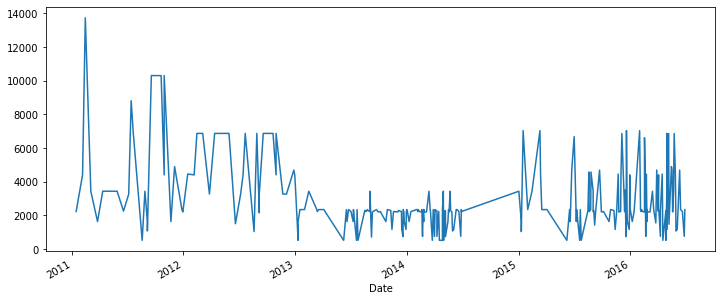

In [47]:
print(Revenue_FEBD.plot(figsize=(12, 5)))

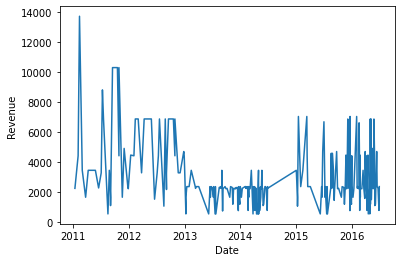

In [48]:
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(Revenue_FEBD)

From the above, we can observe that there is a seasonality associated with the data.

### Test de Stationarité

Stationarity is an important concept in time-series and any time-series data should undergo a stationarity test before proceeding with a model.

In [49]:
grouped_RFEBD=Revenue_FEBD.groupby(by=["Date"]).sum()

<AxesSubplot:xlabel='Date'>

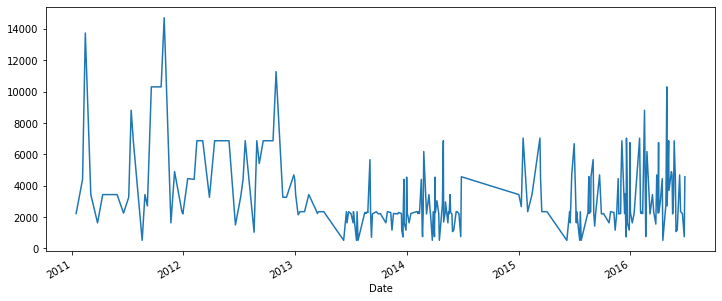

In [50]:
grouped_RFEBD.plot(figsize=(12, 5))
#plt.show()

Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential.
We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs.

      Revenue
Year         
2011   110012
2012   116489
2013   114411
2014   106368
2015   159209
2016   155047


<AxesSubplot:xlabel='Year'>

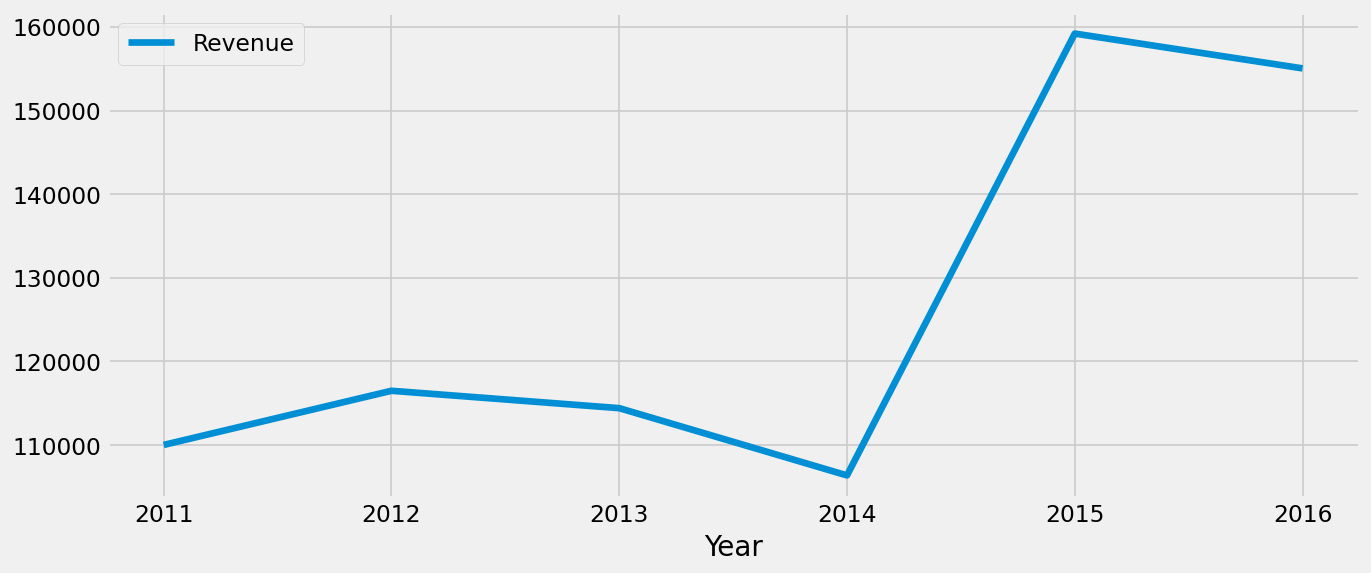

In [212]:
yearly_RFEBD=Yearly_Revenue_FEBD.groupby(by=["Year"]).sum()
print(yearly_RFEBD)
yearly_RFEBD.plot(figsize=(12, 5))

In [51]:
import warnings
import itertools
# defined a matplotlib style of fivethirtyeight for our plots
plt.style.use('fivethirtyeight')

Envisager dans les axes d'amélioration de regrouper les données par mois

In [52]:
# ensure we have no missing values in our time series
filled_GRFEBD=grouped_RFEBD.fillna(grouped_RFEBD.bfill()) # bfill use the value before filling in missing values
print(filled_GRFEBD)

Date
2011-01-15     2227
2011-02-05     4406
2011-02-14    13740
2011-03-04     3435
2011-03-26     1633
              ...  
2016-06-11     4691
2016-06-14     2345
2016-06-20     2227
2016-06-26      752
2016-06-28     4572
Name: Revenue, Length: 236, dtype: int64


<AxesSubplot:xlabel='Date'>

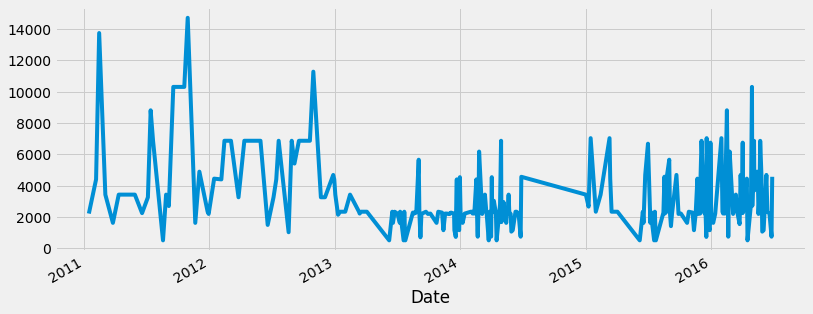

In [53]:
filled_GRFEBD.plot(figsize=(12, 5))

Let’s preprocess our data a little bit before moving forward. 
Weekly data can be tricky to work with since it’s a briefer amount of time, so let’s use monthly averages instead. We’ll make the conversion with the resample function. 

In [54]:
# Resampling the time series data based on months 'M'
monthly_FGRFEBD = filled_GRFEBD.resample('M').mean()
monthly_FGRFEBD

Date
2011-01-31    2227.000000
2011-02-28    9073.000000
2011-03-31    2534.000000
2011-04-30    3435.000000
2011-05-31    3435.000000
                 ...     
2016-02-29    3945.818182
2016-03-31    2742.666667
2016-04-30    4052.500000
2016-05-31    4086.500000
2016-06-30    2625.500000
Freq: M, Name: Revenue, Length: 66, dtype: float64

Test de Dickey-Fuller augmenté (ADF) : La série temporelle est considérée comme stationnaire si la valeur p est faible (selon l’hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l’ADF (Augmented Dickey-Fuller)

    First, I will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

    The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

    So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [55]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
ADF_MFGRFEBD = adfuller(monthly_FGRFEBD.dropna())
print('ADF Statistic: %f' % ADF_MFGRFEBD[0])
print('p-value: %f' % ADF_MFGRFEBD[1])

ADF Statistic: -1.087753
p-value: 0.719931



    As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.

    So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

    If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

    If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.

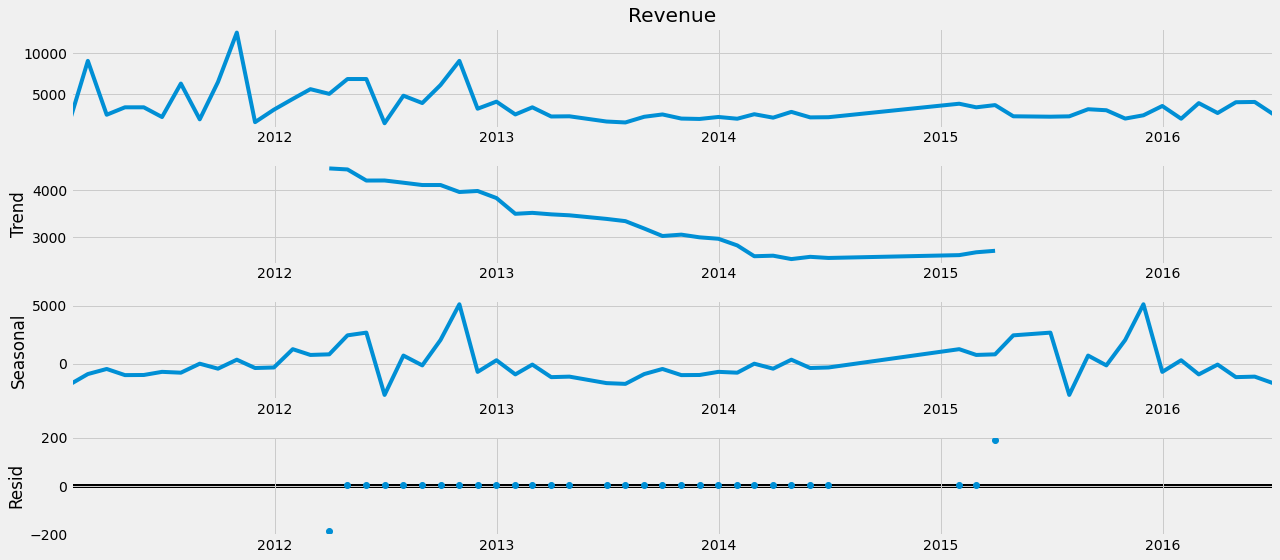

In [56]:
dropped_MFGRFEB= monthly_FGRFEBD.dropna()
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(
    dropped_MFGRFEB, model= 'additive', period= 29)
fig= decomposition.plot()
plt.show()

## Prediction

### SARIMA

#### Parameter Selection

Our first goal is to find the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest. 

We will use a “grid search” to iteratively explore different combinations of parameters.
For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. 
Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest.
Let’s begin by generating the various combination of parameters that we wish to assess.

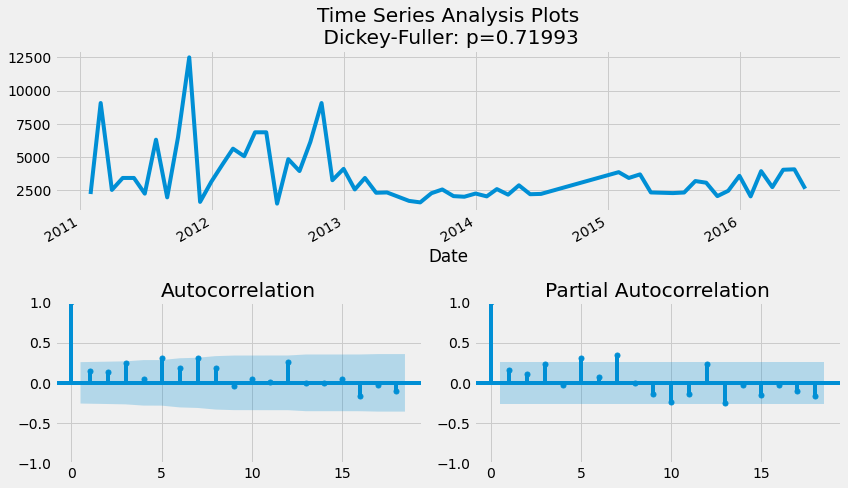

In [57]:
import warnings
warnings.filterwarnings("ignore")

def tsplot(y, lags=None, figsize=(12, 7)):
    """
    Plot time series, its ACF and PACF, calculate Dickey-Fuller test
    
    y - timeseries
    lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(dropped_MFGRFEB)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    #smt.graphics.plot_pacf(y, lags=lags, ax=acf_ax)
    #smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    smt.plot_acf(y, lags=lags, ax=acf_ax)
    #smt.plotpacf(y, lags=lags, ax=pacf_ax)
    smt.plot_pacf(y, lags=lags, ax=pacf_ax)
    #sm.graphics.plot_pacf(y, lags=lags, ax=acf_ax)
    #sm.graphics.plot_pacf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
    #plt.close()
    
tsplot(dropped_MFGRFEB)

#### order of differencing (d)

In [58]:
# Define the p, d and q parameters to take any value between 0 and 9
p = d = q = range(0,2)

# Generate all different combinations of p, q and triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of paraemter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paraemter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


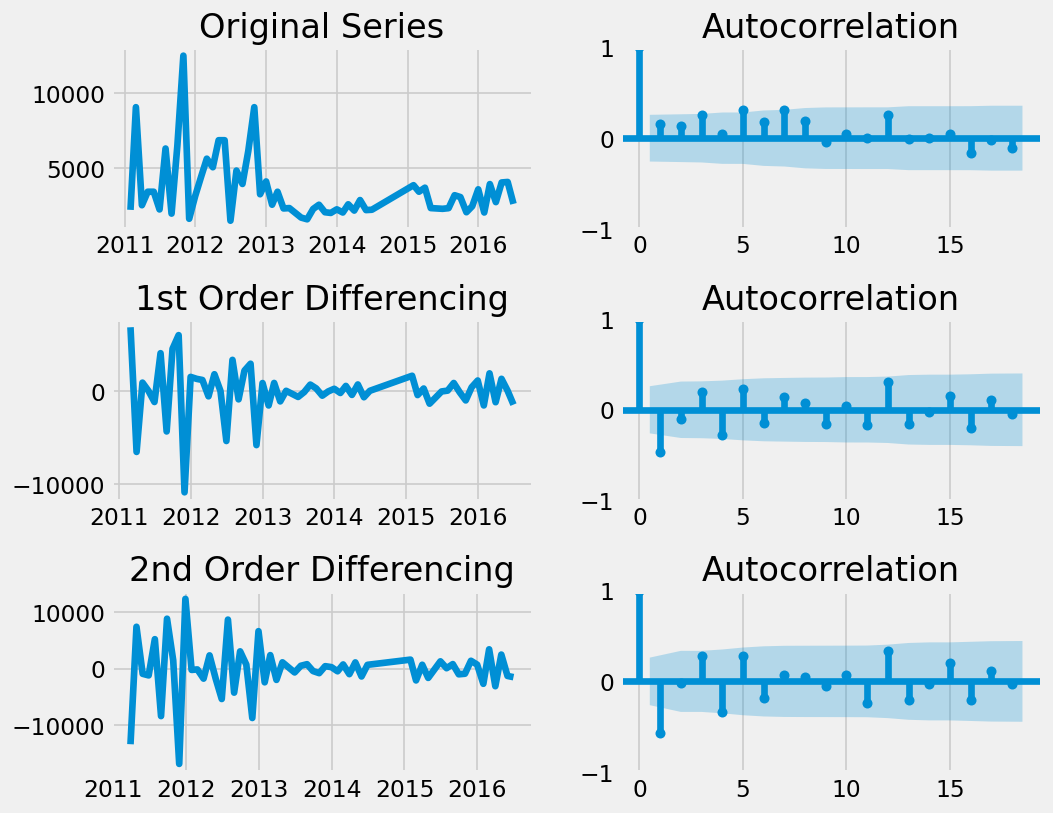

In [82]:
#plt.close()
dated_DMFGRFEB = dropped_MFGRFEB
dated_DMFGRFEB.index = pd.to_datetime(dated_DMFGRFEB.index)
#dropped_MFGRFEB.plot()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)#, sharex=True)
axes[0, 0].plot(dropped_MFGRFEB); axes[0, 0].set_title('Original Series')
plot_acf(dropped_MFGRFEB, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(
    dropped_MFGRFEB.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dropped_MFGRFEB.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[
    2, 0].plot(
    dropped_MFGRFEB.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dropped_MFGRFEB.diff().diff().dropna(), ax=axes[2, 1])

fig.tight_layout() 
plt.show()


For the above data, we can see that the time series reaches stationarity with one order of differencing.

We can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. In Statistics and Machine Learning, this process is known as grid search (or hyperparameter optimization) for model selection.

When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

The code chunk below iterates through combinations of parameters and uses the SARIMAX function from statsmodels to fit the corresponding Seasonal ARIMA model. Here, the order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

diviser vos données en un seul point, ce n'est pas très utile lorsque vous avez des données de séries chronologiques.

Maintenant, disons que vous ne voulez pas simplement diviser régulièrement votre ensemble de données de manière fixe. Supposons que vous ayez des données de séries temporelles et que vous souhaitiez diviser vos données en intervalles fixes. Pour ce type de tâche, vous pouvez fractionner votre jeu de données avec TimeSeriesSplit qui fournit des indices d'entraînement et de test pour fractionner les échantillons de données de séries temporelles observés à des intervalles de temps fixes.

Dans chaque division, les indices de test doivent être plus élevés qu'auparavant et, comme indiqué précédemment, vous ne pouvez pas utiliser le brassage dans un validateur croisé. Ceci est l'exemple d'avion de sklearn

In [85]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(dropped_MFGRFEB):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dropped_MFGRFEB[train_index], dropped_MFGRFEB[test_index]
#    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15 16 17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37 38 39]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47 48]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] TEST: [49 50 51 52 53 54 55 56 57]


In [ ]:
"""
warnings.filterwarnings("ignore") 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=X_train,\
                                            trend='n',\
                                            order=(1,0,1),\
                                            seasonal_order=(1,0,1,12))

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
"""            

#### order of the AR term (p)


    The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

    Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.

    Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.

    Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

### Detecting stationarity

1. La moyenne de la série ne doit pas être fonction du temps. Le graphique rouge ci-dessous n’est pas stationnaire car la moyenne augmente avec le temps.
Modèle ARIMA avec Python - Prévisions de séries temporelles 2

2. La variance de la série ne doit pas être une fonction du temps. Notez dans le graphique rouge ci-dessous la variance des données qui varient dans le temps.
Modèle ARIMA avec Python - Prévisions de séries temporelles 3

3. Enfin, la covariance du i-ème terme et du (i + m)-ième terme ne doit pas être fonction du temps. Dans le graphique suivant, vous remarquerez que l’écart se rapproche à mesure que le temps augmente. Par conséquent, la covariance n’est pas en rapport avec le temps pour la « série rouge ».
Modèle ARIMA avec Python - Prévisions de séries temporelles 4

Si une série temporelle est stationnaire et présente un comportement particulier pendant un intervalle de temps donné, on peut supposer sans risque de se tromper qu’elle présentera le même comportement à un moment ultérieur. La plupart des méthodes de modélisation statistique supposent ou exigent que la série temporelle soit stationnaire.

#### Looking at Autocorrelation Function (ACF) plots

Autocorrelation is the correlation of a signal with a delayed copy — or a lag — of itself as a function of the delay. When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series (see figure 1, right), while for non-stationary data the degradation will happen more slowly (see figure 1, left).

We can see that the 3 first PACF lag are quite significant since they are well above the significance line.
So, we will fix the value of p as 3.

#### find the order of the MA term (q)

    Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

    The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

    Let’s see the autocorrelation plot of the differenced series.

We can see that a few lags are well above the significance line.
So, we will fix q as 4. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76190D+00    |proj g|=  3.77843D-01


 This problem is unconstrained.



At iterate    5    f=  6.62412D+00    |proj g|=  1.05945D-01

At iterate   10    f=  6.61286D+00    |proj g|=  3.94131D-04

At iterate   15    f=  6.61286D+00    |proj g|=  4.10640D-04

At iterate   20    f=  6.61283D+00    |proj g|=  5.55502D-03

At iterate   25    f=  6.60983D+00    |proj g|=  4.38412D-02

At iterate   30    f=  6.59662D+00    |proj g|=  1.18186D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     36      1     0     0   6.229D-06   6.596D+00
  F =   6.5963761351353121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


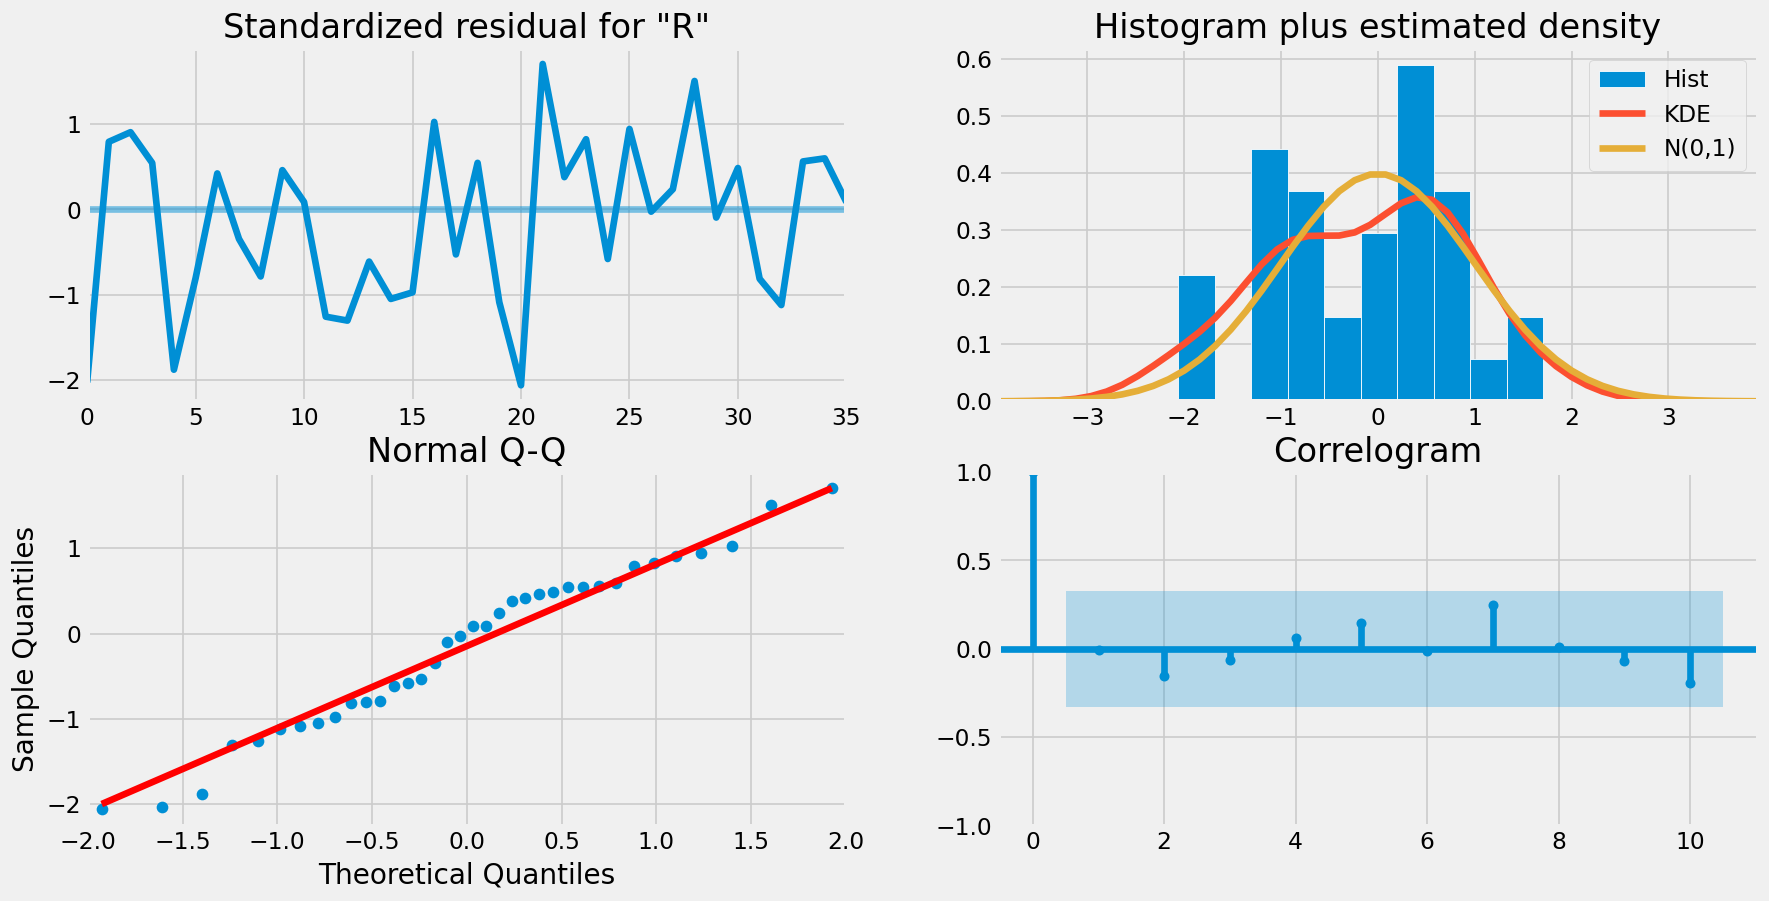

In [104]:
mod = sm.tsa.statespace.SARIMAX(X_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
fitted_m = mod.fit()

fitted_m.plot_diagnostics(figsize=(16, 8))
plt.show()

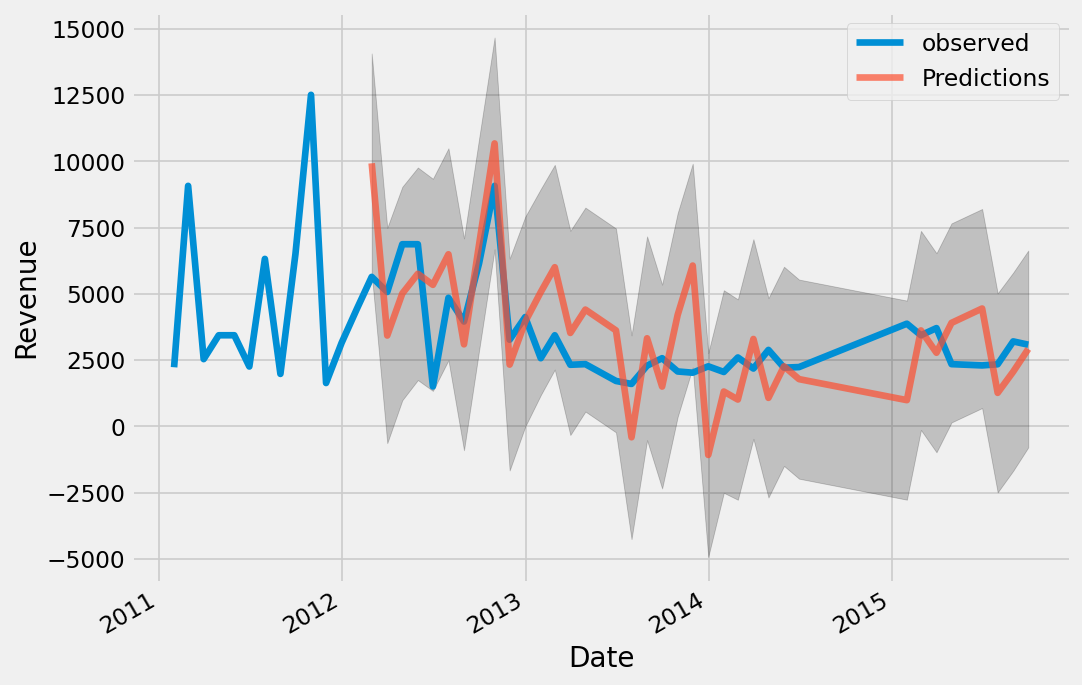

In [109]:
start_forecast = 13
pred = fitted_m.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = X_train.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

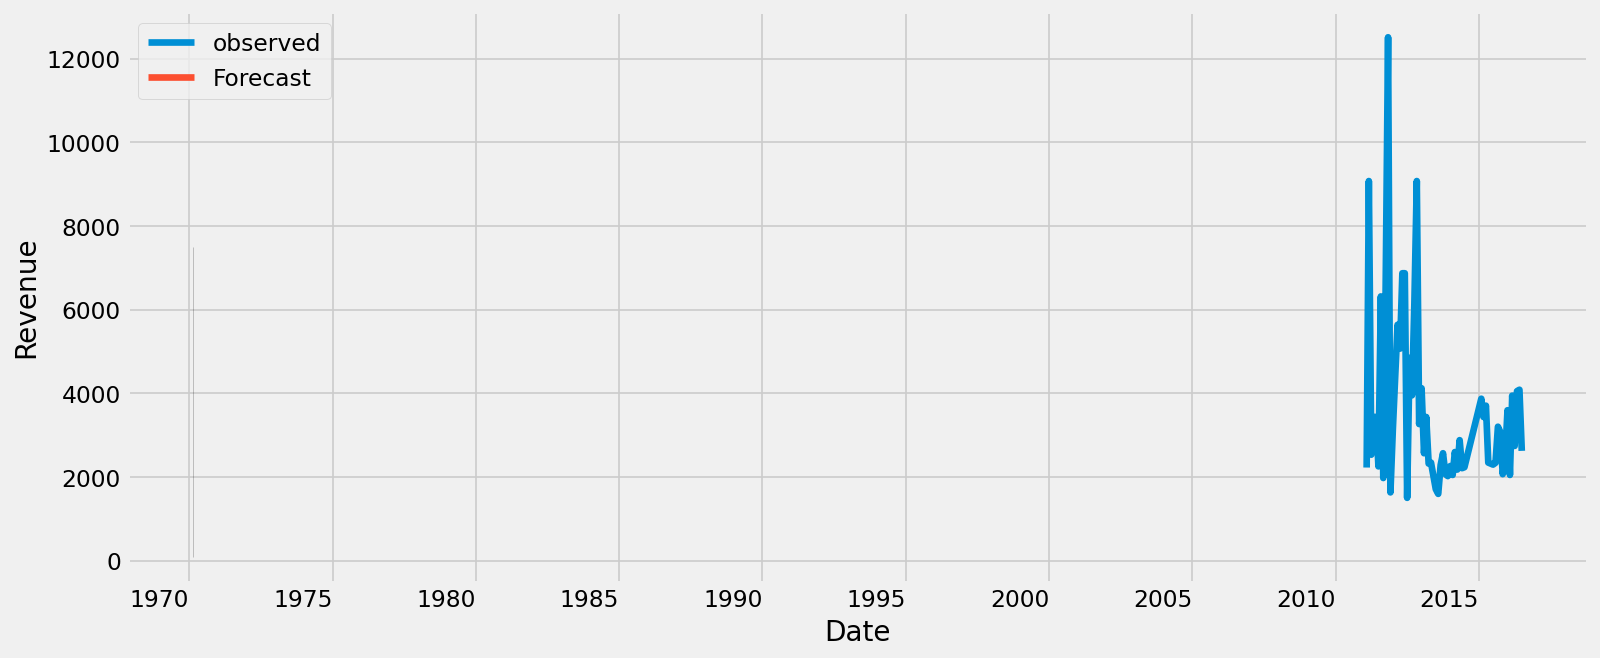

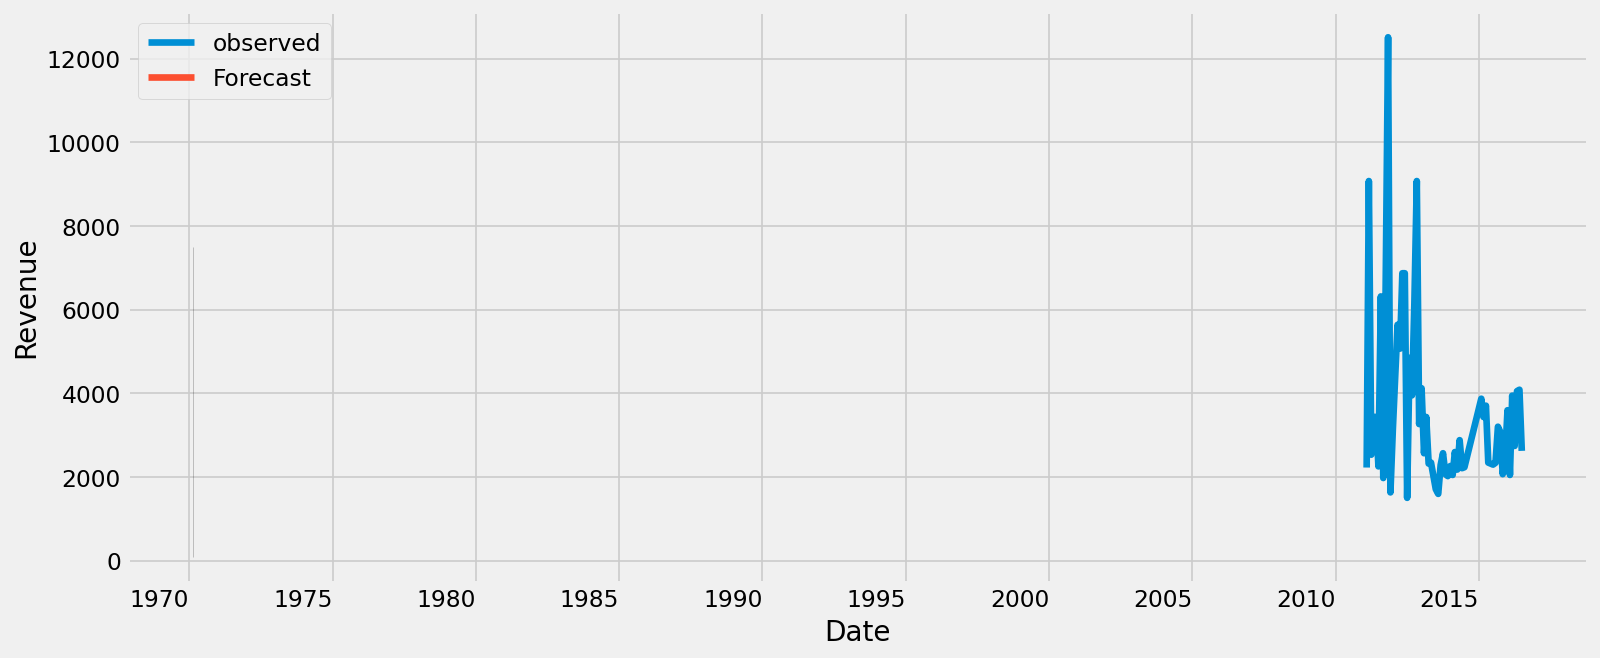

In [120]:
#%% Forecast 1y
years = 1
pred_uc = fitted_m.get_forecast(steps=12*years)
pred_ci = pred_uc.conf_int()
#ax = dated_DMFGRFEB.index.plot(label='observed', figsize=(14, 7))
ax = dated_DMFGRFEB.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_1y.png')
plt.close()

#%% Forecast 5y
years = 5
pred_uc = fitted_m.get_forecast(steps=12*years)
pred_ci = pred_uc.conf_int()
#ax = dated_DMFGRFEB.index.plot(label='observed', figsize=(14, 7))
ax = dated_DMFGRFEB.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

fig.tight_layout() 
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_5y.png')
plt.close()

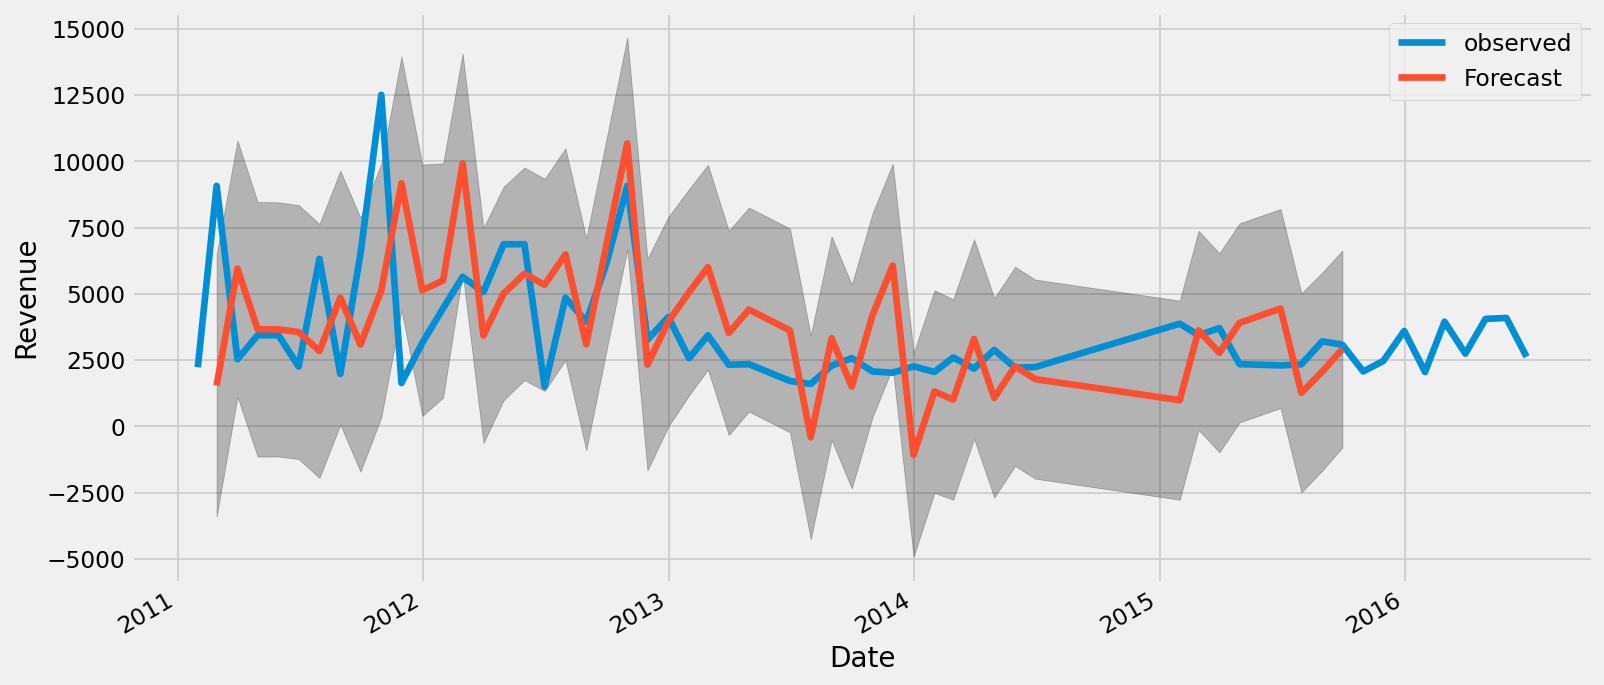

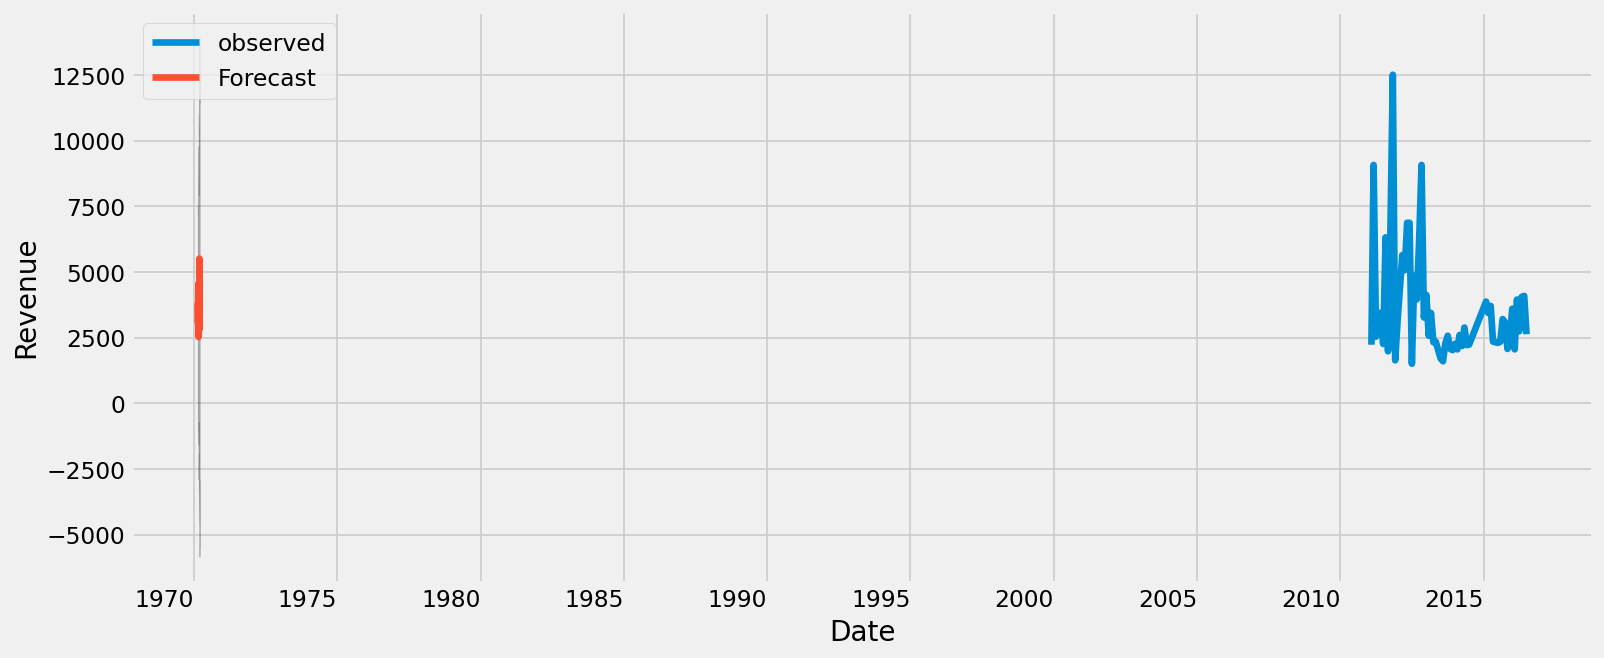

In [215]:
#%% Forecast 1y
years = 1
#pred_uc = fitted_m.get_forecast(steps=12*years)
pred_uc = fitted_m.get_prediction(start=1, end=48, dynamic=False)
pred_ci = pred_uc.conf_int()

#ax = dated_DMFGRFEB.index.plot(label='observed', figsize=(14, 7))
ax = dated_DMFGRFEB.plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_1y.png')
plt.close()

#%% Forecast 5y
years = 5
pred_uc = fitted_m.get_forecast(24)#steps=12*years)
pred_ci = pred_uc.conf_int()

#ax = dated_DMFGRFEB.index.plot(label='observed', figsize=(14, 7))
ax = dated_DMFGRFEB.plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_5y.png')
plt.close()

In [158]:
y_forecasted = pred_uc.predicted_mean
y_truth = dropped_MFGRFEB[49:]

# Compute the mean square error
mse = ((y_forecasted[49:] - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#print(y_forecasted[49:])
print(y_truth)

The Mean Squared Error of our forecasts is nan
Date
2015-10-31    2068.333333
2015-11-30    2467.800000
2015-12-31    3596.500000
2016-01-31    2049.666667
2016-02-29    3945.818182
2016-03-31    2742.666667
2016-04-30    4052.500000
2016-05-31    4086.500000
2016-06-30    2625.500000
Name: Revenue, dtype: float64


In [ ]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


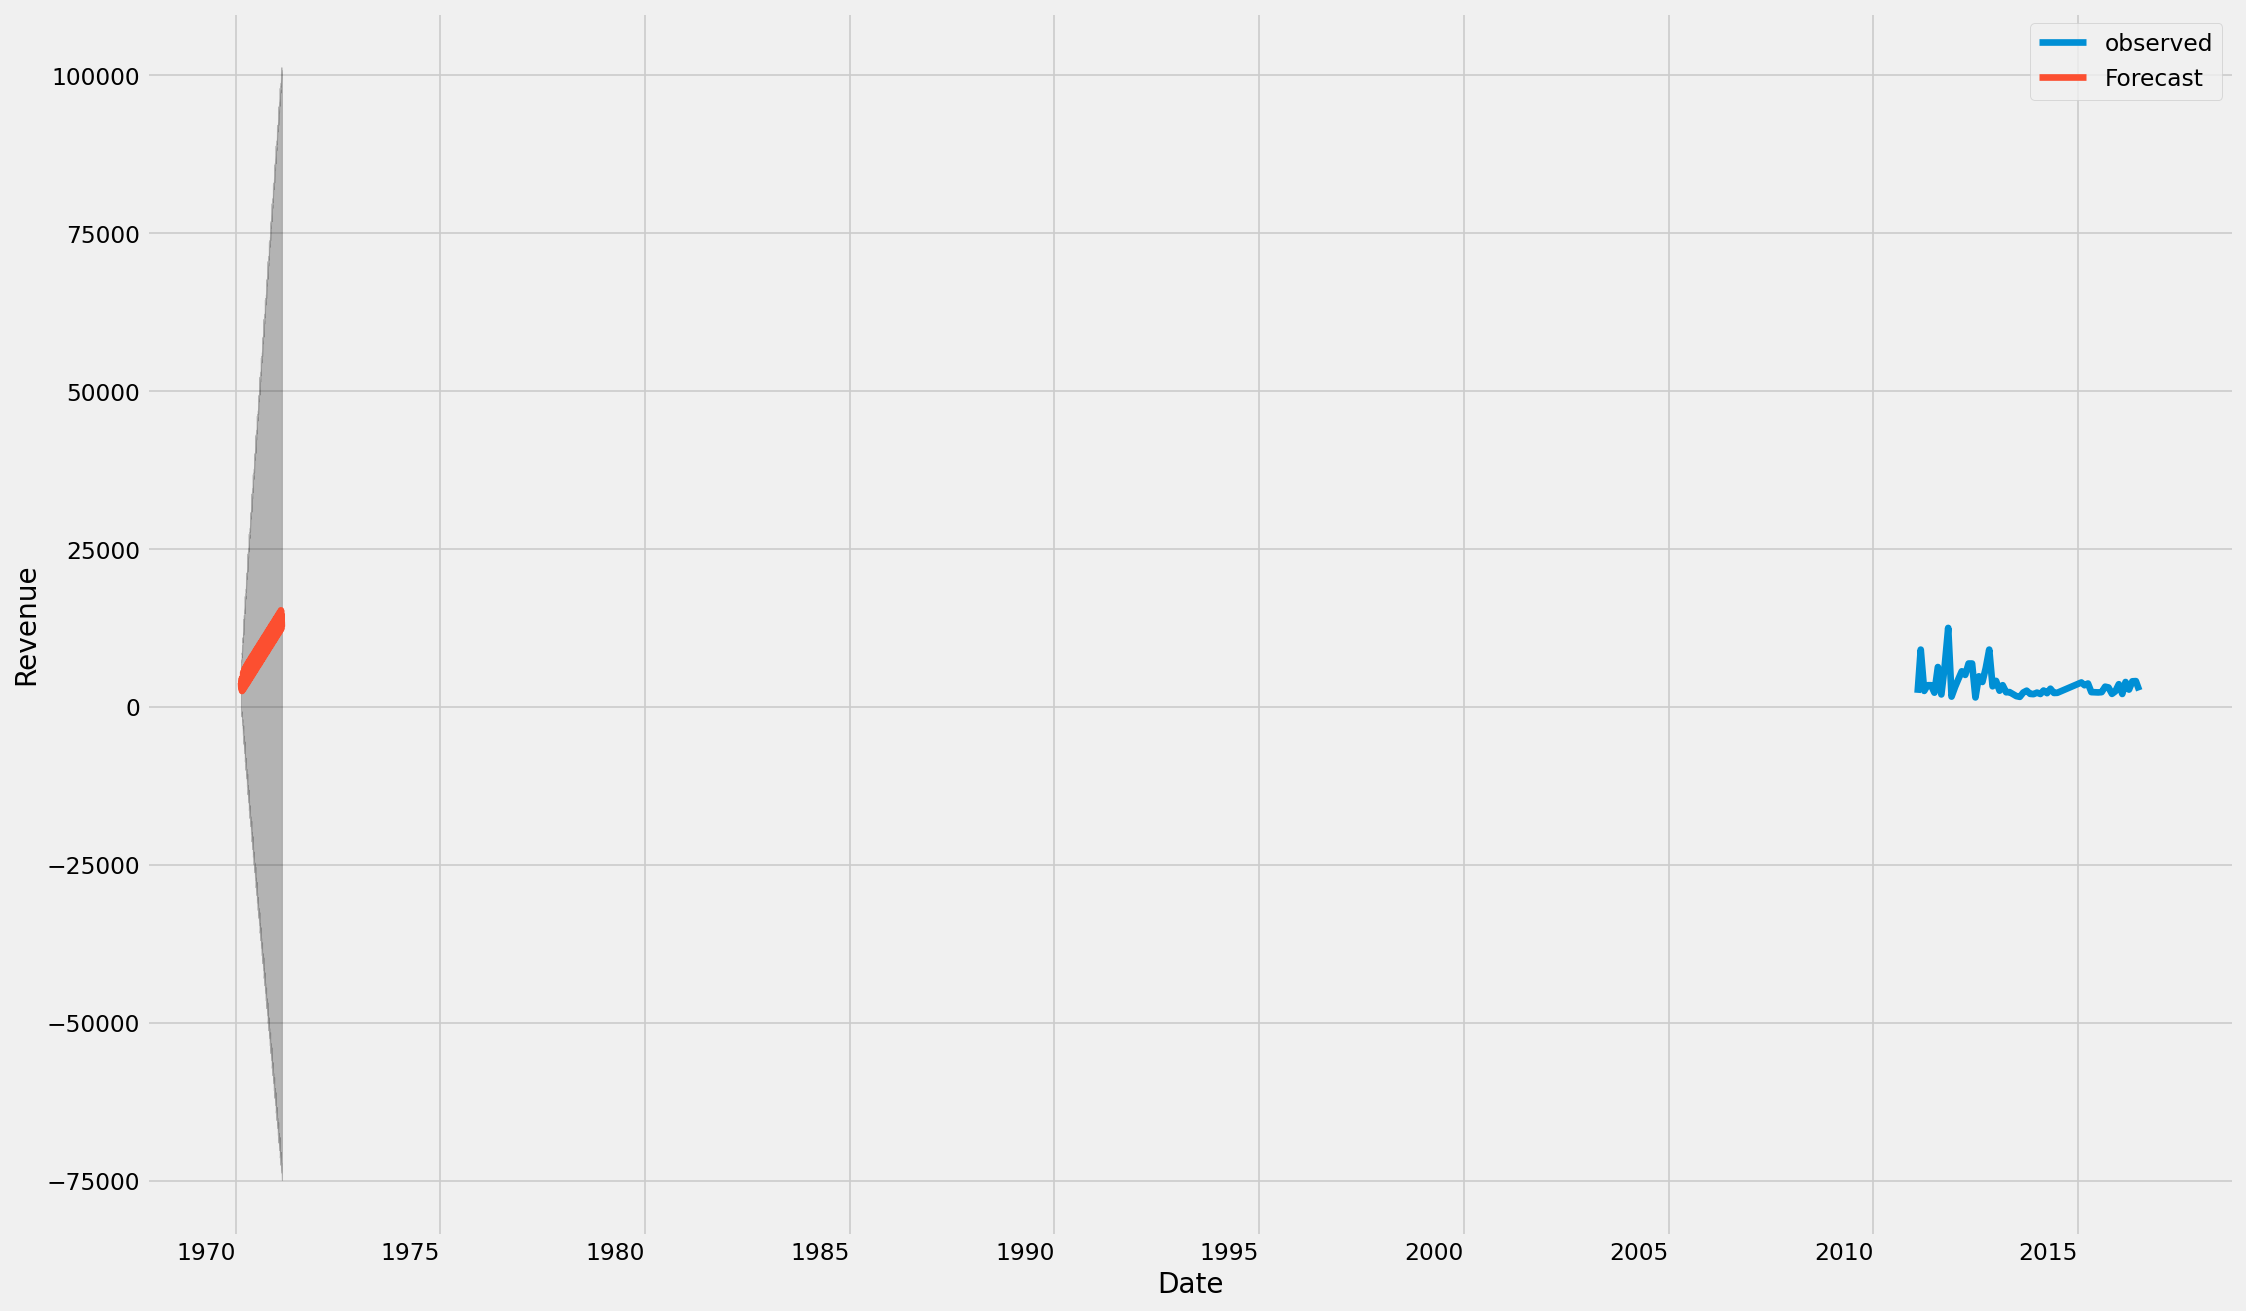

In [187]:
ax = dropped_MFGRFEB.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')

plt.legend()
plt.show()

In [200]:
fitted_m.forecast(10)[58]

2518.505332147169

In [160]:
dropped_MFGRFEB

Date
2011-01-31     2227.000000
2011-02-28     9073.000000
2011-03-31     2534.000000
2011-04-30     3435.000000
2011-05-31     3435.000000
2011-06-30     2255.000000
2011-07-31     6316.333333
2011-08-31     1976.500000
2011-09-30     6506.500000
2011-10-31    12508.000000
2011-11-30     1633.000000
2011-12-31     3149.000000
2012-01-31     4454.000000
2012-02-29     5638.000000
2012-03-31     5068.000000
2012-04-30     6870.000000
2012-05-31     6870.000000
2012-06-30     1503.000000
2012-07-31     4847.333333
2012-08-31     3953.500000
2012-09-30     6143.000000
2012-10-31     9073.000000
2012-11-30     3266.000000
2012-12-31     4121.000000
2013-01-31     2569.000000
2013-02-28     3435.000000
2013-03-31     2321.400000
2013-04-30     2345.000000
2013-06-30     1710.250000
2013-07-31     1597.666667
2013-08-31     2287.800000
2013-09-30     2569.000000
2013-10-31     2068.333333
2013-11-30     2022.400000
2013-12-31     2262.583333
2014-01-31     2049.666667
2014-02-28     2596.909

In [163]:
#fitted_m
#pred
pred_ci

,lower Revenue,upper Revenue
49,100.691562,7508.377336
50,-870.614111,7155.571046
51,-1108.523594,7331.707895
52,-1365.149762,7453.979103
53,-1494.427889,7686.180296
54,-906.677711,8621.582043
55,-1516.398505,8347.563978
56,-1580.624229,8608.697883
57,-711.225698,9794.880198
58,-2890.156546,7927.167210


In [165]:
#pred_uc# = fitted_m.get_prediction(start=12, end=36, dynamic=False)
#pred_ci = pred_uc.conf_int()
pred_uc.predicted_mean

49     3804.534449
50     3142.478468
51     3111.592150
52     3044.414671
53     3095.876204
54     3857.452166
55     3415.582736
56     3514.036827
57     4541.827250
58     2518.505332
59     3183.841031
60     3302.079806
61     4547.446044
62     3453.837944
63     3633.941561
64     3537.590635
65     3069.400578
66     4223.656913
67     3548.467304
68     4124.940429
69     5505.410984
70     2804.700360
71     3405.304764
72     3602.993697
73     5018.683984
74     3783.631517
75     4032.888630
76     3926.975894
77     3288.466222
78     4571.426426
79     3819.764419
80     4552.911783
81     6048.975833
82     3126.246101
83     3705.634349
84     3929.363653
85     5400.878895
86     4119.467000
87     4391.389678
88     4282.342989
89     3588.009816
90     4913.153655
91     4136.427260
92     4920.925753
93     6454.876418
94     3459.378297
95     4031.812794
96     4264.077020
97     5753.889300
98     4457.282764
99     4736.634246
100    4626.560381
101    3913.

In [ ]:
conda install -c conda-forge prophet

In [ ]:
print('Training a prophet...')
m = Prophet()
m.fit(X_train)

#%% Forecast 1 year
years = 1
future = m.make_future_dataframe(periods=365*years)
future.tail()

fig1 = m.plot(forecast)
plt.savefig(current_dir + os.sep + 'PROPHET_FORECAST_1y.png')
plt.close()

fig2 = m.plot_components(forecast)
plt.savefig(current_dir + os.sep + 'PROPHET_COMPONENTS.png')
plt.close()

### ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(monthly_resampled_data.dropna(), order=(1, 1, 2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,4 ARIMA Model
model2 = ARIMA(dropped_d, order=(1, 1, 4))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

    The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

    The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

    So, we will rebuild the model without the MA4 term.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(monthly_resampled_data.dropna(), order=(1, 1, 4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,3 ARIMA Model
model3 = ARIMA(dropped_d, order=(1, 1, 1))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_DMFGDO = ARIMA(dropped_MFGDO.dropna(), order=(1, 1, 4))
model_fit_DMFGDO = model_DMFGDO.fit(disp=0)
print(model_fit_DMFGDO.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_DMFGDO = ARIMA(dropped_MFGDO.dropna(), order=(1, 1, 3))
model_fit_DMFGDO = model_DMFGDO.fit(disp=0)
print(model_fit_DMFGDO.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_DMFGDO = ARIMA(dropped_MFGDO.dropna(), order=(1, 1, 2))
model_fit_DMFGDO = model_DMFGDO.fit(disp=0)
print(model_fit_DMFGDO.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_DMFGDO = ARIMA(dropped_MFGDO.dropna(), order=(1, 1, 1))
model_fit_DMFGDO = model_DMFGDO.fit(disp=0)
print(model_fit_DMFGDO.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_DMFGDO = ARIMA(dropped_MFGDO.dropna(), order=(3, 1, 4))
model_fit_DMFGDO = model_DMFGDO.fit(disp=0)
print(model_fit_DMFGDO.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_DMFGDO = ARIMA(dropped_MFGDO.dropna(), order=(3, 1, 4))
model_fit_DMFGDO = model_DMFGDO.fit(disp=0)
print(model_fit_DMFGDO.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model3 = ARIMA(dropped_d, order=(1, 1, 3))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

    The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

    Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [ ]:
#wtf?
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model4 = ARIMA(dropped_d, order=(1, 1, 2))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())

    The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

    Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [ ]:
# Plot residuals errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(monthly_resampled_data.dropna(), order=(1, 1, 2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

    When we set dynamic=False the in-sample lagged values are used for prediction. That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

    So, we seem to have a decent ARIMA model. But, we can’t say that this is the best ARIMA model because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

    So, the real validation we need now is the Out-of-Time cross-validation, discussed next.

### optimal ARIMA model using Out-of-Time Cross validation

    In Out-of-Time cross-validation, we move backwards in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.

    To do so, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on time frequency of series.

In [ ]:
#from statsmodels.tsa.statools import acf
from statsmodels.tsa.stattools import acf

dfd = monthly_resampled_data.dropna()
# Create Training and Test
#train = dfd[:'2015-03-150']
#test = dfd['2015-03-150':]
train = dfd[:'2015-03-15']
#test = = dfd['2015-03-15':]
test = dfd['2015-03-15':]

Now, we will build the ARIMA model on training dataset, forecast and plot it.

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 3))
fitted = model.fit(disp=-1)

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05) # 95%

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, 
                 upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
France_dd = dropped_d.Revenue.loc[dropped_d.Revenue['Country'] == 'France']
#dropped_d
# data.sort_index(axis = 0, ascending = True)
print(France_dd.sort_index(axis = 0, ascending = True).head(10))
print(France_dd.Order_Quantity.plot(figsize=(12, 5)))

### Auto ARIMA

In AUto ARIMA, the model itself will generate the optimal p, d and q values which would be suitable for the data set to provide better forecasting.

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(monthly_resampled_data)

If False, From the above, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

### SARIMA

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality:

    P: Seasonal autoregressive order.
    D: Seasonal difference order.
    Q: Seasonal moving average order.
    m: The number of time steps for a single seasonal period.
    
The trend and seasonal hyperparameters of the model can be configured by analyzing autocorrelation and partial autocorrelation plots, and this can take some expertise.

An alternative approach is to grid search a suite of model configurations and discover which configurations work best for a specific univariate time series.    

#### Develop a Grid Search Framework

We will use the implementation of SARIMA provided by the statsmodels library.

This model has hyperparameters that control the nature of the model performed for the series, trend and seasonality, specifically:

    order: A tuple p, d, and q parameters for the modeling of the trend.
    sesonal_order: A tuple of P, D, Q, and m parameters for the modeling the seasonality
    trend: A parameter for controlling a model of the deterministic trend as one of ‘n’,’c’,’t’,’ct’ for no trend, constant, linear, and constant with linear trend, respectively.

In [ ]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import filterwarnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

We can start-off by defining a function that will fit a model with a given configuration and make a one-step forecast.

The sarima_forecast() below implements this behavior.

The function takes an array or list of contiguous prior observations and a list of configuration parameters used to configure the model, specifically two tuples and a string for the trend order, seasonal order trend, and parameter.

We also try to make the model robust by relaxing constraints, such as that the data must be stationary and that the MA transform be invertible.

In [ ]:
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, 
                    enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

build up some functions for fitting and evaluating a model repeatedly via walk-forward validation, including splitting a dataset into train and test sets and evaluating one-step forecasts

In [ ]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

After forecasts have been made for each step in the test dataset, they need to be compared to the test set in order to calculate an error score.

In [ ]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [ ]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(yhat)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, perdictions)
    return error

In [ ]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

In [ ]:
#from joblib import Parallel
#from os import cpu_count
#executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')

In [ ]:
# create a set of sarima configs to try
def sarima_configs(seasonal=[12]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 2, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

In [ ]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (
            delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [ ]:
if __name__ == '__main__':
    # define dataset
    print(dropped_MFGDO)
    # data split
    n_test = 4
    # model configs
    cfg_list = sarima_configs()
    # grid search
    scores = grid_search(dropped_MFGDO, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

In [ ]:
print(dropped_MFGDO)

#### Time Series Forecast in Python using SARIMAX and PROPHET

##### SARIMAX

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dropped_MFGDO, model='additive', period = 30)
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
warnings.filterwarnings("ignore") 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=dropped_MFGDO,\
                                            trend='n',\
                                            order=(1,0,1),\
                                            seasonal_order=(1,0,1,12))

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
warnings.filterwarnings("ignore") 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=monthly_FGFDO,\
                                            trend='n',\
                                            order=(1,0,1),\
                                            seasonal_order=(1,0,1,12))

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
warnings.filterwarnings("ignore") 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=fill_GFDO,\
                                            trend='n',\
                                            order=(1,0,1),\
                                            seasonal_order=(1,0,1,12))

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue